# Spectral Embedding

## Network compression

Networks are a high-dimensional discrete data that can be difficult to analyze with traditional machine learning methods that assume continuous and smooth data. Spectral embedding is a technique to embed networks into low-dimensional spaces.

Let us approach the spectral embedding from the perspective of network compression.
Suppose we have an adjacency matrix $\mathbf{A}$ of a network.
The adjacency matrix is a high-dimensional data, i.e., a matrix has size $N \times N$ for a network of $N$ nodes.
We want to compress it into a lower-dimensional matrix $\mathbf{U}$ of size $N \times d$ for a user-defined small integer $d < N$.
A good $\mathbf{U}$ should preserve the network structure and thus can reconstruct the original data $\mathbf{A}$ as closely as possible.
This leads to the following optimization problem:

$$
\min_{\mathbf{U}} J(\mathbf{U}),\quad J(\mathbf{U}) = \| \mathbf{A} - \mathbf{U}\mathbf{U}^\top \|_F^2
$$

where:

1. $\mathbf{U}\mathbf{U}^\top$ is the outer product of $\mathbf{U}$ and represents the reconstructed network.
2. $\|\cdot\|_F$ is the Frobenius norm, which is the sum of the squares of the elements in the matrix.
3. $J(\mathbf{U})$ is the loss function that measures the difference between the original network $\mathbf{A}$ and the reconstructed network $\mathbf{U}\mathbf{U}^\top$.

By minimizing the Frobenius norm with respect to $\mathbf{U}$, we obtain the best low-dimensional embedding of the network.


### An intuitive solution for the optimization problem

Let us first understand the solution intuitively.
Consider the spectral decomposition of $\mathbf{A}$:

$$
\mathbf{A} = \sum_{i=1}^N \lambda_i \mathbf{u}_i \mathbf{u}_i^\top
$$

where $\lambda_i$ are weights and $\mathbf{u}_i$ are column vectors. Each term $\lambda_i \mathbf{u}_i \mathbf{u}_i^\top$ is a rank-one matrix that captures a part of the network's structure. The larger the weight $\lambda_i$, the more important that term is in describing the network.


To compress the network, we can select the $d$ terms with the largest weights $\lambda_i$. By combining the corresponding $\mathbf{u}_i$ vectors into a matrix $\mathbf{U}$, we obtain a good low-dimensional embedding of the network.

![](../figs/spectral-decomposition.jpg)

For a formal proof, please refer to the [Appendix section](./appendix.md).

### An example for the spectral embedding

Let us demonstrate the results with a simple example as follows.

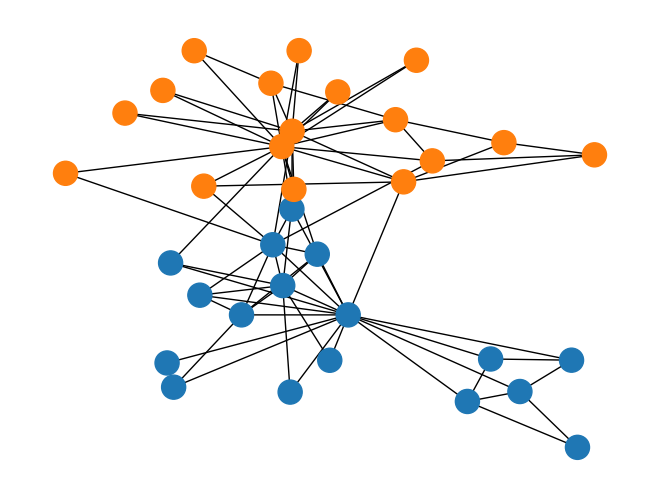

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small example network
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
labels = np.unique([d[1]['club'] for d in G.nodes(data=True)], return_inverse=True)[1]
cmap = sns.color_palette()
nx.draw(G, with_labels=False, node_color=[cmap[i] for i in labels])

/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


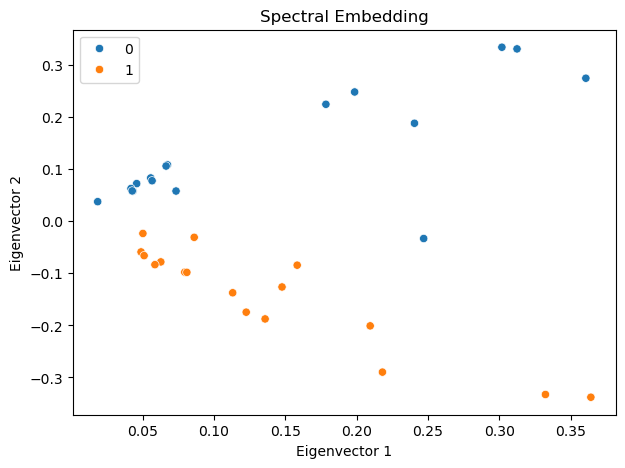

In [2]:
# Compute the spectral decomposition
eigvals, eigvecs = np.linalg.eig(A)

# Find the top d eigenvectors
d = 2
sorted_indices = np.argsort(eigvals)[::-1][:d]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# Plot the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = eigvecs[:, 0], y = eigvecs[:, 1], hue=labels, ax=ax)
ax.set_title('Spectral Embedding')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
plt.show()

Interestingly, the first eigenvector corresponds to the eigen centrality of the network, representing the centrality of the nodes.
The second eigenvector captures the community structure of the network, clearly separating the two communities in the network.

## Modularity embedding

In a similar vein, we can use the modularity matrix to generate a low-dimensional embedding of the network.
Namely, let us define the modularity matrix $\mathbf{Q}$ as follows:

$$
Q_{ij} = \frac{1}{2m}A_{ij} - \frac{k_i k_j}{4m^2}
$$

where $k_i$ is the degree of node $i$, and $m$ is the number of edges in the network.

We then compute the eigenvectors of $\mathbf{Q}$ and use them to embed the network into a low-dimensional space just as we did for the adjacency matrix.

/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


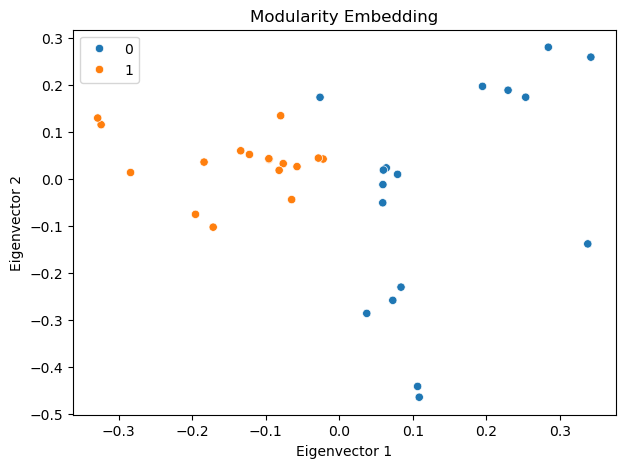

In [3]:
deg = np.sum(A, axis=1)
m = np.sum(deg) / 2
Q = A - np.outer(deg, deg) / (2 * m)
Q/= 2*m

eigvals, eigvecs = np.linalg.eig(Q)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(-eigvals)[:d]  # Exclude the first eigenvector
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = eigvecs[:, 0], y = eigvecs[:, 1], hue=labels, ax=ax)
ax.set_title('Modularity Embedding')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
plt.show()

```{note}
The modularity embedding can be used to bipartition the network into two communities using a simple algorithm: group nodes with the same sign of the second eigenvector {footcite}`newman2006modularity`.
```

## Laplacian Eigenmap

Laplacian Eigenmap {footcite}`belkin2003laplacian` is another approach to compress a network into a low-dimensional space. The fundamental idea behind this method is to position connected nodes close to each other in the low-dimensional space. This approach leads to the following optimization problem:

$$
\min_{\mathbf{U}} J_{LE}(\mathbf{U}),\quad J_{LE}(\mathbf{U}) = \frac{1}{2}\sum_{i,j} A_{ij} \| u_i - u_j \|^2
$$

In this equation, $\| u_i - u_j \|^2$ represents the squared distance between nodes $i$ and $j$ in the low-dimensional space. The goal is to minimize this distance for connected nodes (where $A_{ij} = 1$). The factor $\frac{1}{2}$ is included for mathematical convenience in later calculations.

To solve this optimization problem, we rewrite $J_{LE}(\mathbf{U})$ as follows:

$$
\begin{aligned}
J_{LE}(\mathbf{U}) &= \frac{1}{2}\sum_{i}\sum_{j} A_{ij} \| u_i - u_j \|^2 \\
&= \frac{1}{2}\sum_{i}\sum_{j} A_{ij} \left( \| u_i \|^2 - 2 u_i^\top u_j + \| u_j \|^2 \right) \\
&= \sum_{i}\sum_{j} A_{ij} \| u_i \|^2 - \sum_{i}\sum_{j} A_{ij} u_i^\top u_j\\
&= \sum_{i} k_i \| u_i \|^2 - \sum_{i,j} A_{ij} u_i^\top u_j\\
&= \sum_{i,j} L_{ij} u_i^\top u_j
\end{aligned}
$$

where

$$
L_{ij} = \begin{cases}
k_i & \text{if } i = j \\
-A_{ij} & \text{if } i \neq j
\end{cases}
$$

Let us go through the derivation step by step.

1. In the first step (i.e., the second line), we expand the squared norm using the vector identity $\|a-b\|^2 = \|a\|^2 - 2a^\top b + \|b\|^2$.

2. In the second step (i.e., the third line), we distribute the sum and the factor $\frac{1}{2}$.
The middle term gets a factor of 1 because it appears twice in the expansion (once for $i,j$ and once for $j,i$), canceling out the $\frac{1}{2}$. Note that the term $A_{ij}$ is symmetric, i.e., $A_{ij} = A_{ji}$.

3. In the third step (i.e., the fourth line), we recognize that $\sum_j A_{ij}$ is the degree of node $i$, which we denote as $k_i$.

4. Finally, we combine the terms by using the Laplacian matrix $\mathbf{L}$.

The minimization problem can be rewritten as:

$$
J_{LE}(\mathbf{U}) = \text{Tr}(\mathbf{U}^\top \mathbf{L} \mathbf{U})
$$

where

$$
\mathbf{U} =
\begin{bmatrix}
\mathbf{u}_1 ^\top \\
\mathbf{u}_2 ^\top \\
\vdots \\
\mathbf{u}_N ^\top \\
\end{bmatrix}
$$

See the [Appendix section](./appendix.md) for the detailed derivation.

By taking the derivative of $J_{LE}(\mathbf{U})$ with respect to $\mathbf{U}$ and set it to zero, we obtain the following equation:

$$
\frac{\partial J_{LE}}{\partial \mathbf{U}} = 0 \implies \mathbf{L} \mathbf{U} = \lambda \mathbf{U}
$$

The solution is the $d$ eigenvectors associated with the $d$ smallest eigenvalues of $\mathbf{L}$.

It is important to note that the eigenvector corresponding to the smallest eigenvalue (which is always zero for connected graphs) is trivial - it's the all-one vector. Therefore, in practice, we typically compute the $d+1$ smallest eigenvectors and discard the one corresponding to the zero eigenvalue.


### An example for the Laplacian Eigenmap

Let us first compute the Laplacian matrix and its eigenvectors.

In [4]:
D = np.diag(np.sum(A, axis=1))
L = D - A

eigvals, eigvecs = np.linalg.eig(L)

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigvals)[1:d+1]  # Exclude the first eigenvector
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

The eigenvectors corresponding to the $d$ smallest eigenvalues are:

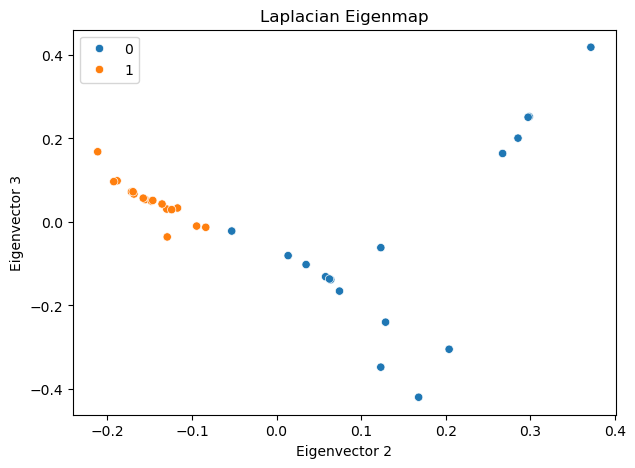

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = eigvecs[:, 0], y = eigvecs[:, 1], hue=labels, ax=ax)
ax.set_title('Laplacian Eigenmap')
ax.set_xlabel('Eigenvector 2')
ax.set_ylabel('Eigenvector 3')
plt.show()

```{footbibliography}
```